## Deep RL Reacher Agent - How it works and what it does

Unity ML-Agents Toolkit provides a variety of open-source 3D environments that can be used to train an intelligent agent. In this project we'll look at the single agent Reacher environment. The objective is to have the end of a robot arm learn follow a sphere in orbit around the arm. The sphere will most often orbit the arm, at varying speeds determined at the start of each training episode, but occassionally will not move at all.


### Learning Algorithm

The learning algorithm being used is DDPG, and it's being used to solve the single agent version of the environment. The idea behind DDPG was to apply the success of the DQN to continuous actions, something that DQN was not designed to achieve. The researchers behind DDPG were able to solve more than 20 simulated physics tasks with no changes to hyperparameters of their network, demonstrating impressive performance.

The DDPG algorithm uses what are known as actor and critic neural nets to achieve continuous actions. The actor network predicts the best action and the critic network predicts what the value of that action will be. Considering the success of DQN however and borrowing an idea from there, DDPG also utilizes target networks to stabilize the training which the DDPG team actually described in their paper as being 'crucial'.

To cement my understanding I read a lot of online content like blogs, reviewed code written by other people, and read the original research paper.

- https://pemami4911.github.io/blog/2016/08/21/ddpg-rl.html
- https://spinningup.openai.com/en/latest/algorithms/ddpg.html
- https://medium.com/@kinwo/solving-continuous-control-environment-using-deep-deterministic-policy-gradient-ddpg-agent-5e94f82f366d
- https://arxiv.org/pdf/1509.02971.pdf 


##### Actor network
The actor network is implemented as follows, where state_size is the size of the environment state (33 for Reacher), the output action_size is the number of actions available to the agent (4 for Reacher) and all hidden layers have 256 nodes. 

This number of hidden nodes was found through trial and error and was found to solve the environment in fewer episodes than other configurations. In the DDPG paper they mention they used 2 hidden layers, as I do here, however they used 400 units on the first and 300 units on the second hidden layers whereas I am using 256 nodes for all hidden layers.
    - self.fc1 = nn.Linear(state_size, hidden)
    - self.bn1 = nn.BatchNorm1d(hidden)
    - self.fc2 = nn.Linear(hidden, hidden)
    - self.fc3 = nn.Linear(hidden, action_size)
    
##### Critic network
The critic network is very similar to the one described in the DDPG paper however during experimenting I made a few changes, and ultimately decided on the following architecture. Just like the network described in the DDPG paper, here the actions are being concatenated as input after the first hidden layer, as opposed to including it with the input to the network.
    - self.fc1 = nn.Linear(state_size, hidden)
    - self.bn1 = nn.BatchNorm1d(hidden)
    - self.fc2 = nn.Linear(hidden+action_size, hidden)
    - self.fc3 = nn.Linear(hidden, hidden)
    - self.fc4 = nn.Linear(hidden, 1)

These networks also use the 'fan-in' type initialization mentioned in the Experiment Details section of the DDPG paper.


##### Noise generator
While reading the OpenAI Spinning Up page about DDPG they mentioned that basic gaussian noise was often just as good in practice as the OU noise used in the DDPG paper. I decided to experiment a bit and try gaussian noise, which seems to have worked just fine to solve the environment. I also introduced a decay factor so the agent would take fewer exploratory actions as it learned a better policy, the noise method may not be the best option available, but was a fun experiment and still does the trick.

The noise function for gaussian noise is straightforward in numpy, where the scale parameter is the standard deviation of the distribution of the noise and size is the size of the output and dictated by the action space (4 for Reacher).
    - noise = np.random.normal(loc=0.0, scale=self.scale, size=self.size)
   
##### Hyperparameter choices
To select the hyperparameters to train the network I used a mix of trial and error and best-practice suggestions. 

The BUFFER_SIZE And BATCH_SIZE parameters were selected through trial and error and were found to enable stable training. The parameter GAMMA it typically set to 0.99 so I continued with that choice, TAU is the soft update parameter determining how much of the local weights to copy to the target network, and uses the same value as the LR learning rate parameter for training the network via gradient descent. The UPDATE_EVERY and LEARN_TIMES parameters were suggested in the Udacity slides so I tried these settings first and found them to support stable training of the network, so I kept these suggested values.

    - BUFFER_SIZE = 200000    # replay buffer size
    - BATCH_SIZE = 256        # minibatch size
    - GAMMA = 0.99            # discount factor
    - TAU = 1e-3              # for soft update of target parameters
    - LR = 0.001              # learning rate for the actor and critic networks
    - UPDATE_EVERY = 20       # how often to update the network - this was suggested on the benchmark page
    - LEARN_TIMES = 10        # how many batches to sample and learn from 
    
##### Ideas for Future Improvements
There are many things you could do to improve the performance of this algorithm. I used the single agent environment but training with the 20 agent environment, having 20 agents contribute to the replay buffer and exercising the policy, this would help the agent to train faster and potentially become more skilled. 

Prioritized replay could be used to enhance the speed of training and skill of the trained agent, this is a nice low-hanging-fruit type of improvement that would be a sendible next step to improve the agent.

Or we could try out a different algorithm entirely, an algorithm that can take advantage of a multiagent training environment and offer parallel training like D4PG.


### Let's train an agent!

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 10	Average Score: 0.62	Actual Score:1.45
Episode 20	Average Score: 0.84	Actual Score:1.58
Episode 30	Average Score: 1.31	Actual Score:0.79
Episode 40	Average Score: 1.72	Actual Score:3.33
Episode 50	Average Score: 2.44	Actual Score:4.41
Episode 60	Average Score: 3.13	Actual Score:4.970
Episode 70	Average Score: 3.54	Actual Score:7.13
Episode 80	Average Score: 4.37	Actual Score:16.03
Episode 90	Average Score: 5.27	Actual Score:10.69
Episode 100	Average Score: 5.95	Actual Score:19.70
Episode 110	Average Score: 7.35	Actual Score:15.85
Episode 120	Average Score: 9.02	Actual Score:23.46
Episode 130	Average Score: 11.21	Actual Score:26.51
Episode 140	Average Score: 13.21	Actual Score:29.38
Episode 150	Average Score: 15.34	Actual Score:28.91
Episode 160	Average Score: 17.16	Actual Score:24.29
Episode 170	Average Score: 19.68	Actual Score:34.20
Episode 180	Average Score: 21.47	Actual Score:33.86
Episode 190	Average Score: 22.76	Actual Score:31.31
Episode 200	Average Score: 24.37	Actual

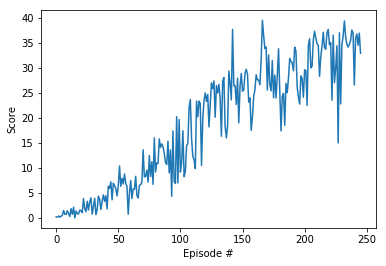

In [1]:
from ddpg_agent import Agent
import DDPG_train as ddpg
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.ion()

# create the 3D unity enironment
brain_name, env, env_info, state, state_size, action_size = ddpg.new_unity_environment()

# create the DDPG based learning agent
agent = Agent(state_size=state_size, action_size=action_size, seed=777)
scores = ddpg.ddpg_train(agent, env, brain_name, state_size)
env.close()

# plot the scores after training to a 100 episode average score of 30
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


### Watch a trained agent!

Run the code cell below to watch a trained agent in the Unity environment. We'll load the saved weights for the actor and critic networks, copy those weights into the corresponding target networks, then start up the agent and watch it perform.

Run the next code cell to see the trained agent in action!

In [1]:
from ddpg_agent import Agent
from collections import deque
import DDPG_train as ddpg
import numpy as np
import matplotlib.pyplot as plt
import torch
%matplotlib inline
plt.ion()

brain_name, env, env_info, state, state_size, action_size = ddpg.new_unity_environment()

# load the weights for the model that was trained to 
agent = Agent(state_size=state_size, action_size=action_size)

agent.actor_local.load_state_dict(torch.load('./30.04_actor_checkpoint.pth'))
agent.critic_target.load_state_dict(torch.load('./30.04_critic_checkpoint.pth'))
agent.copy_weights_from_local_to_target()

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score

while True:
    action = agent.act(state)
    env_info = env.step(action)[brain_name]
    next_state = env_info.vector_observations[0]
    reward = env_info.rewards[0]
    done = env_info.local_done[0]
    score += reward

    agent.step(state, action, reward, next_state, done)

    state = next_state
    if done:                                       # exit loop if episode finished
        env.close()
        break
    
print("Score: {}".format(score))

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Score: 12.129999728873372
